
###Data reading and importing modules###




In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import randint
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import set_option
plt.style.use('ggplot')

In [ ]:
pd.options.display.max_columns = 50

In [ ]:
data = pd.read_csv("/content/UCI_Credit_Card.csv")

NameError: ignored

In [ ]:
data.head()

###Categorical columns###
sex, education, marriage 

In [ ]:
data.shape

(22041, 25)

###EDA###

In [ ]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,22041.000000,22041.000000,22040.000000,22040.000000,22040.000000,22040.000000,22040.000000,22040.000000,22040.000000,22040.000000,22040.000000,22040.000000,22040.000000,22040.000000,2.204000e+04,22040.000000,22040.000000,22040.000000,22040.000000,2.204000e+04,22040.000000,22040.000000,22040.000000,22040.000000,22040.000000
mean,11021.000000,162927.892564,1.602042,1.841742,1.561933,35.309574,0.019419,-0.103312,-0.134437,-0.194283,-0.234710,-0.259710,50322.161978,48380.871733,4.608923e+04,41962.340926,39767.444419,38354.095100,5504.820191,5.788233e+03,4853.098503,4692.252632,4687.957078,5092.812568,0.227450
std,6362.832978,128591.879082,0.489488,0.775434,0.521573,9.351772,1.121497,1.199501,1.204877,1.166055,1.139661,1.163627,71722.778975,69539.773917,6.738321e+04,62164.659744,59661.773802,58799.252592,15155.895218,2.127658e+04,16026.840108,14864.551789,15020.778132,17390.775599,0.419195
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-46627.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5511.000000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3807.750000,3238.000000,2.908000e+03,2400.000000,1793.500000,1243.000000,1000.000000,7.800000e+02,350.750000,270.000000,234.750000,32.000000,0.000000
50%,11021.000000,130000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22712.000000,21791.500000,2.025950e+04,19051.000000,18263.500000,17164.000000,2091.500000,2.000000e+03,1649.500000,1500.000000,1500.000000,1441.000000,0.000000
75%,16531.000000,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65491.500000,62623.250000,5.910850e+04,51715.500000,49630.000000,48754.500000,5000.000000,5.000000e+03,4137.250000,4000.000000,4000.000000,4000.000000,0.000000
max,22041.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,505000.000000,1.684259e+06,896040.000000,497000.000000,417990.000000,528666.000000,1.000000


Q1- How many people with high limit credit cards are defaulting?

Q2- Check for bill_amt3 and pay_amt2

In [ ]:
limit = (data['LIMIT_BAL'] > 500000).sum()
limit #no. of peoples more than the limit

137

In [ ]:
limit = (data['LIMIT_BAL'] < 500000).sum()
limit   #no. of peoples less than the limit

21397

In [ ]:
data.rename(columns = {'default.payment.next.month':'default'}, inplace=True)

In [ ]:
data[data['LIMIT_BAL'] > 250000].value_counts('default', normalize=True)

default
0.0    0.853612
1.0    0.146388
dtype: float64

In [ ]:
data.value_counts('default', normalize = True)

default
0.0    0.77255
1.0    0.22745
dtype: float64

In [ ]:
data[data['BILL_AMT3'] == 1664089]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
5296,5297,500000.0,2.0,1.0,1.0,33.0,-2.0,-2.0,-1.0,-1.0,-2.0,-1.0,125.0,-18088.0,1664089.0,121757.0,97115.0,377217.0,4366.0,1684259.0,121831.0,97670.0,379267.0,26759.0,0.0


In [ ]:
data['SEX'].value_counts(dropna=False, normalize =True)

2.0    0.602014
1.0    0.397940
NaN    0.000045
Name: SEX, dtype: float64

In [ ]:
data['EDUCATION'].value_counts(dropna=False, normalize =True)

2.0    0.472438
1.0    0.354249
3.0    0.159838
5.0    0.008212
4.0    0.003312
6.0    0.001452
0.0    0.000454
NaN    0.000045
Name: EDUCATION, dtype: float64

In [ ]:
data['MARRIAGE'].value_counts(dropna = False)

2.0    11923
1.0     9832
3.0      249
0.0       36
NaN        1
Name: MARRIAGE, dtype: int64

Maybe we can combine cat 0 and 3, but before that we need to analyze if these 323 and 54 customers are similar or not?

In [ ]:
data['PAY_0'].value_counts(dropna=False)

 0.0    10830
-1.0     4229
 1.0     2787
 2.0     2064
-2.0     1777
 3.0      240
 4.0       63
 8.0       17
 5.0       17
 6.0        9
 7.0        7
 NaN        1
Name: PAY_0, dtype: int64

In [ ]:
data['PAY_2'].value_counts(dropna=False)

 0.0    11598
-1.0     4470
 2.0     3007
-2.0     2578
 3.0      250
 4.0       70
 5.0       21
 1.0       19
 7.0       17
 6.0        9
 8.0        1
 NaN        1
Name: PAY_2, dtype: int64

In [ ]:
data['PAY_3'].value_counts(dropna=False)

 0.0    11627
-1.0     4388
 2.0     2925
-2.0     2798
 3.0      170
 4.0       63
 7.0       27
 6.0       20
 5.0       16
 1.0        4
 8.0        2
 NaN        1
Name: PAY_3, dtype: int64

Club the categories 3,4 and beyond under a single category >3 M delay

In [ ]:
pd.crosstab(data['MARRIAGE'], data['default'])

default,0.0,1.0
MARRIAGE,,
0.0,35,1
1.0,7440,2392
2.0,9369,2554
3.0,183,66


In [ ]:
pd.crosstab(data['SEX'], data['MARRIAGE'])

MARRIAGE,0.0,1.0,2.0,3.0
SEX,,,,
1.0,10,3802,4854,105
2.0,26,6030,7069,144


[]

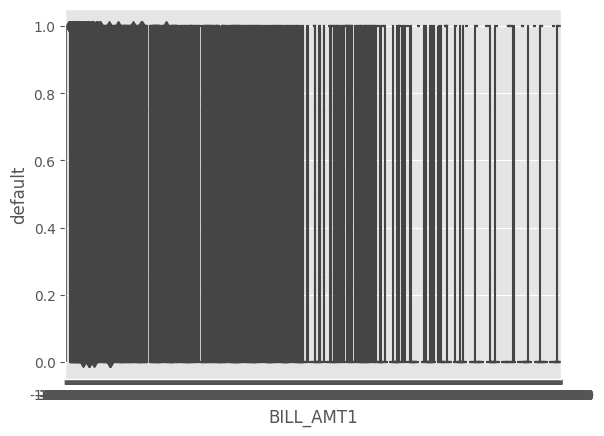

In [ ]:
sns.boxplot(data = data, x = "BILL_AMT1", y = 'default')
plt.plot()


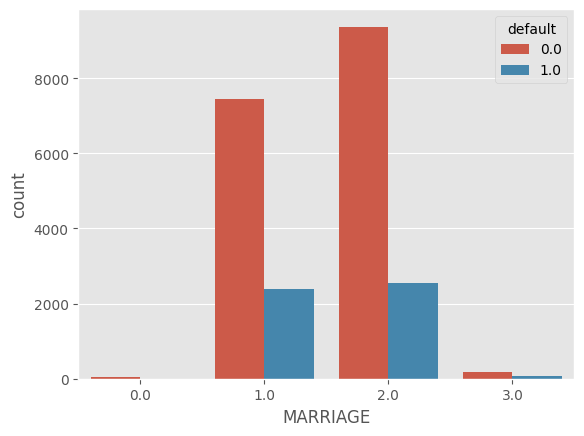

In [ ]:
sns.countplot(data, x = 'MARRIAGE', hue = 'default')
plt.show()

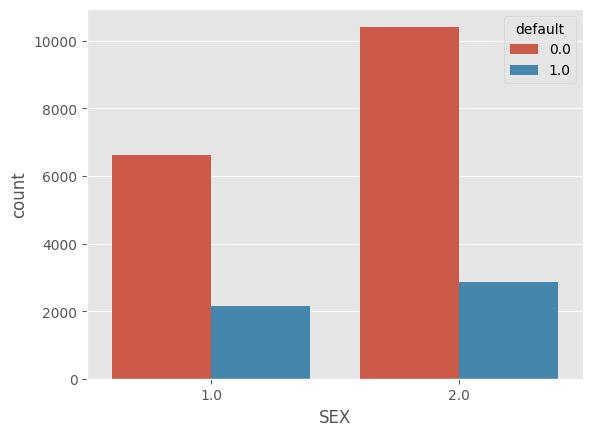

In [ ]:
sns.countplot(data, x = 'SEX', hue = 'default')
plt.show()

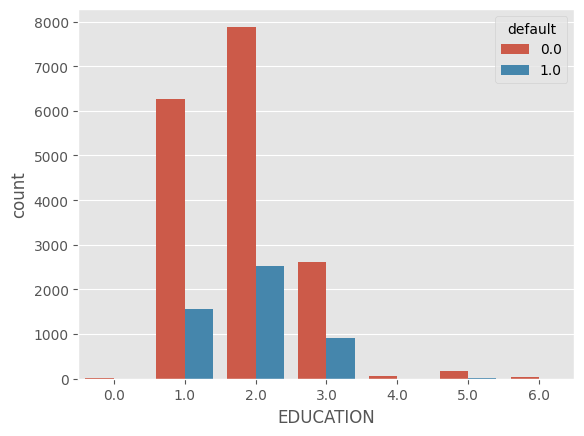

In [ ]:
sns.countplot(data, x = 'EDUCATION', hue = 'default')
plt.show()

#analysis of numerical coulmns

In [ ]:
#univariate analysis

[]

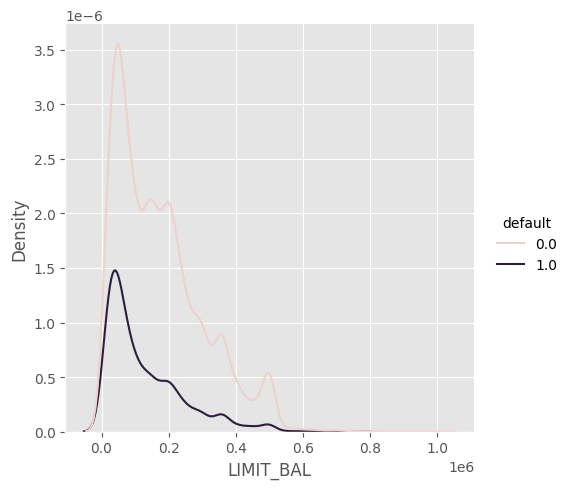

In [ ]:
sns.displot(data = data, x = "LIMIT_BAL", hue= 'default', kind= 'kde')
plt.plot()


Q- DO PEOPLE WHO HAVE DRWAN OUT A LOT OF MONEY IN THE LAST MONTH TEND TO DEFAULT MORE?


[]

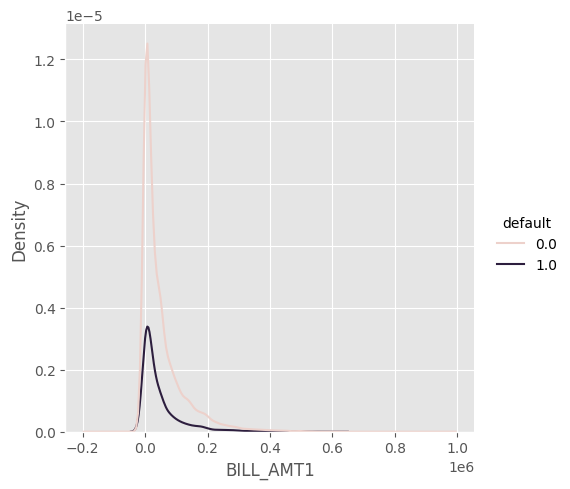

In [ ]:
sns.displot(data = data, x = "BILL_AMT1", hue= 'default', kind= 'kde')
plt.plot()


Q- DOES PEOPLE WITH HIGHER LIMIT TEND TO SPEND MORE?

In [ ]:
sns.boxplot(data = data, x = "BILL_AMT1", y = 'default')
plt.plot()


[]

In [ ]:
#scatter plot

In [ ]:
sns.scatterplot(data = data, x='LIMIT_BAL', y = 'BILL_AMT1', hue = 'default')
plt.plot()

In [ ]:
sns.scatterplot(data=data, x='LIMIT_BAL', y = 'AGE')
plt.show()

#Data Cleaning & Preprocessing

In [ ]:
data.isnull().sum()

In [ ]:
data['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)

In [ ]:
data['EDUCATION'].value_counts()

In [ ]:
data['EDUCATION'].replace(to_replace=[4,5,6], value=0, inplace=True)

#Feature Engineering Tip

In [ ]:
data['PAY_0'].value_counts()

#oUTLIER dETECTION

In [ ]:
data['LIMIT_BAL'].describe()

In [ ]:
print(np.percentile(data['LIMIT_BAL'],10))
print(np.percentile(data['LIMIT_BAL'],20))
print(np.percentile(data['LIMIT_BAL'],30))
print(np.percentile(data['LIMIT_BAL'],40))
print(np.percentile(data['LIMIT_BAL'],50))
print(np.percentile(data['LIMIT_BAL'],60))
print(np.percentile(data['LIMIT_BAL'],70))
print(np.percentile(data['LIMIT_BAL'],80))
print(np.percentile(data['LIMIT_BAL'],90))
print(np.percentile(data['LIMIT_BAL'],100))

In [ ]:
print(np.percentile(data['LIMIT_BAL'],90))
print(np.percentile(data['LIMIT_BAL'],91))
print(np.percentile(data['LIMIT_BAL'],92))
print(np.percentile(data['LIMIT_BAL'],93))
print(np.percentile(data['LIMIT_BAL'],94))
print(np.percentile(data['LIMIT_BAL'],95))
print(np.percentile(data['LIMIT_BAL'],96))
print(np.percentile(data['LIMIT_BAL'],97))
print(np.percentile(data['LIMIT_BAL'],98))
print(np.percentile(data['LIMIT_BAL'],99))
print(np.percentile(data['LIMIT_BAL'],100))

In [ ]:
data['AGE'].describe()

In [ ]:
print(np.percentile(data['AGE'],10))
print(np.percentile(data['AGE'],20))
print(np.percentile(data['AGE'],30))
print(np.percentile(data['AGE'],40))
print(np.percentile(data['AGE'],50))
print(np.percentile(data['AGE'],60))
print(np.percentile(data['AGE'],70))
print(np.percentile(data['AGE'],80))
print(np.percentile(data['AGE'],90))
print(np.percentile(data['AGE'],100))

In [ ]:
#Corresponding to 5296, change the value of BILL_AMT3 and PAY_AMT

In [ ]:
data.loc[[5296],['BILL_AMT3']] = 500000

In [ ]:
data.loc[[5296],:]

In [ ]:
data.loc[[5296],['PAY_AMT2']] = 518088

In [ ]:
data.loc[[5296],:]

#Skewness

In [ ]:
data['AGE'].skew()

In [ ]:
sns.displot(data['AGE'], kind = 'kde')
plt.show()

In [ ]:
import scipy.states
scipy.states.skew(np.log(data['AGE']))

In [ ]:
sns.displot(np.log(data['AGE']), kind = 'kede')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
age_ = ss.fit_transform(np.array(data['AGE']).reshape(len(data),1))